### Randomness
Elements of Data Science Week 7

## Simulation Learning Goals
Simulate a task dependent on probability such as a die roll, repeat to get distribution and characteristics (mean, ...)
- Probability
    - np.random.choice()
- Simulation: Sample the distribution
    - Repeat and collect outcomes
    - Iteration: 
        `for i in np.arange(samples)`
- Examine resulting distribution of outcomes
    - Probability distribution
    - Uncertainty

#### A random distributions play a large role in statistical inference

In [1]:
import numpy as np
from datascience import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Coin toss

In [41]:
toss = np.array(['Heads', 'Tails'])
tosses=np.random.choice(toss,100)
tosses

array(['Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails',
       'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads',
       'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Heads',
       'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads',
       'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails',
       'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads',
       'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails', 'Heads',
       'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails',
       'Tails', 'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads',
       'Heads', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails',
       'Heads', 'Tai

In [42]:
tosses != 'Tails'

array([ True, False,  True,  True,  True, False, False,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
        True, False, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True, False, False, False,  True,  True, False,  True, False,
        True,  True,  True,  True, False, False, False, False,  True, False], dtype=bool)

In [44]:
np.count_nonzero(tosses == 'Heads')/len(tosses)*100

59.0

### Simulate
- Simulate a set of 100 coin tosses, how many heads?
- Repeat simulation 20,000 times

In [45]:
def one_simulated_value(num_tosses):
    outcomes = np.random.choice(toss, num_tosses)
    return np.count_nonzero(outcomes == 'Heads')

In [49]:
num_repetitions = 20000   # number of repetitions

heads = make_array() # empty collection array

for i in np.arange(num_repetitions):   # repeat the process num_repetitions times
    new_value = one_simulated_value(100)  # simulate one value using the function defined
    heads = np.append(heads, new_value) # augment the collection array with the simulated value

# That's it! The simulation is done.

In [50]:
simulation_results = Table().with_columns(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Number of Heads', heads
)

In [51]:
simulation_results.show(3)

Repetition,Number of Heads
1,54
2,44
3,46


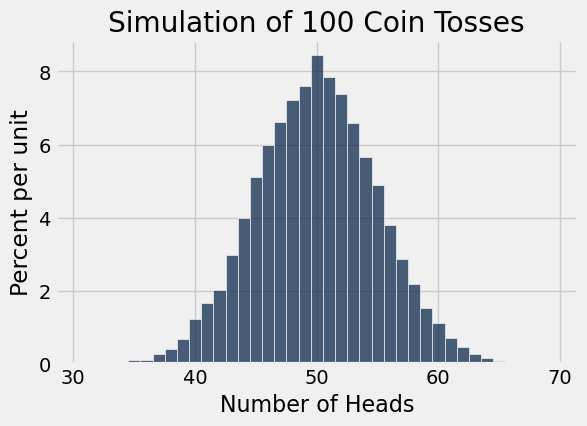

In [52]:
simulation_results.hist('Number of Heads', bins = np.arange(30.5, 69.6, 1))
plt.title('Simulation of 100 Coin Tosses')
plt.savefig('Simcoin.png')

## Die roll betting simulation
Bet a dollar on a single die roll
Outcomes. See [Inferential Thinking](https://inferentialthinking.com/chapters/09/Randomness.html)

    - 0 or 1: lose a dollar (-$1)
    - 2 or 3: no change (0)
    - 4 or 5: gain a dollar (+$1)

In [ ]:
def bet_on_one_roll():
    """Returns my net gain on one bet"""
    x = np.random.choice(np.arange(1, 7))  # roll a die once and record the number of spots
    if x <= 2:
        return -1
    elif x <= 4:
        return 0
    elif x <= 6:
        return 1

In [ ]:
outcomes = np.array([])

for i in np.arange(600):
    outcome_of_bet = bet_on_one_roll()
    outcomes = np.append(outcomes, outcome_of_bet)
    
print(outcomes[0:10])
len(outcomes)

In [ ]:
outcome_table = Table().with_column('Outcome', outcomes)
outcome_table.group('Outcome').barh(0)

## Sampling

In [53]:
marbles = np.random.choice(['purple','green'],100)
marbles

array(['green', 'purple', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'purple', 'green', 'green',
       'green', 'purple', 'green', 'green', 'green', 'green', 'purple',
       'purple', 'purple', 'green', 'green', 'purple', 'purple', 'green',
       'purple', 'green', 'purple', 'purple', 'green', 'purple', 'purple',
       'purple', 'green', 'green', 'green', 'green', 'green', 'purple',
       'purple', 'green', 'green', 'green', 'purple', 'green', 'green',
       'green', 'green', 'green', 'green', 'purple', 'green', 'purple',
       'green', 'purple', 'green', 'green', 'green', 'purple', 'purple',
       'purple', 'purple', 'purple', 'green', 'purple', 'green', 'purple',
       'green', 'purple', 'green', 'green', 'purple', 'purple', 'green',
       'green', 'purple', 'purple', 'purple', 'green', 'purple', 'green',
       'purple', 'purple', 'green', 'green', 'purple', 'purple', 'purple',
       'purple', 'green', 'green', 'purple', 'green

In [54]:
population = Table().with_columns('Color',marbles)
population

Color
green
purple
green
green
green
green
green
green
green
green


In [55]:
population.where('Color','purple').num_rows/population.num_rows

0.43

In [59]:
sample = population.sample(5)
sample

Color
green
purple
purple
purple
green


In [60]:
sample.where('Color','purple').num_rows/sample.num_rows

0.6

In [61]:
outcomes = np.array([])

for i in np.arange(1000):
    outcome = population.sample(10).where('Color','purple').num_rows/10
    outcomes = np.append(outcomes, outcome)
    
print(outcomes[0:10])
len(outcomes)

[ 0.5  0.4  0.4  0.5  0.5  0.5  0.5  0.5  0.7  0.4]


1000

In [62]:
outcomes.mean()

0.42419999999999997

In [63]:
outcome_table = Table().with_column('Outcome', outcomes)
outcome_table

Outcome
0.5
0.4
0.4
0.5
0.5
0.5
0.5
0.5
0.7
0.4


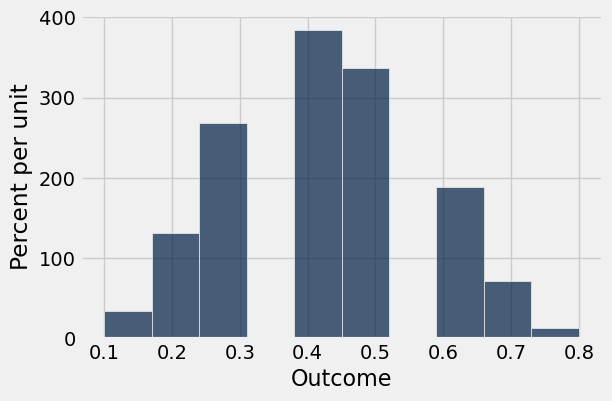

In [64]:
outcome_table.hist(0, )

## Text sampling

In [3]:
acid_string = open('data/acidbase_wikipedia.txt',encoding='utf-8').read()

In [4]:
acid_words = acid_string.split()
acid_words[:10]

['In',
 'chemistry,',
 'an',
 'acid–base',
 'reaction',
 'is',
 'a',
 'chemical',
 'reaction',
 'that']

In [5]:
def word_freq(words):
    f = {} # Create an empty dictionary to store letters and their count found in words
    for word in words:
            word = word.lower()
            if word.isalpha(): # avoid punctuation
                f[word] = f.get(word,0) + 1 # Using Python dictionary
    return f

In [6]:
word_dictionary = word_freq(acid_words)


In [7]:
word_dictionary.keys()

dict_keys(['in', 'an', 'reaction', 'is', 'a', 'chemical', 'that', 'occurs', 'between', 'acid', 'and', 'it', 'can', 'be', 'used', 'to', 'determine', 'ph', 'via', 'several', 'theoretical', 'frameworks', 'provide', 'alternative', 'conceptions', 'of', 'the', 'mechanisms', 'their', 'application', 'solving', 'related', 'these', 'are', 'called', 'for', 'importance', 'becomes', 'apparent', 'analyzing', 'reactions', 'gaseous', 'or', 'liquid', 'when', 'base', 'character', 'may', 'somewhat', 'less', 'first', 'concepts', 'was', 'provided', 'by', 'french', 'chemist', 'antoine', 'around', 'important', 'think', 'models', 'as', 'theories', 'complement', 'each', 'current', 'lewis', 'model', 'has', 'broadest', 'definition', 'what', 'with', 'theory', 'being', 'subset', 'acids', 'bases', 'arrhenius', 'most'])

In [8]:
percent_word = np.array(list(word_dictionary.values())/np.sum(np.array(list(word_dictionary.values()))))*100

In [9]:
Table().with_columns('word',word_dictionary.keys(),'count',word_dictionary.values(), \
                     'percent',percent_word).sort('count',descending=True).show(20)

word,count,percent
the,10,8.06452
and,5,4.03226
of,5,4.03226
reaction,4,3.22581
in,3,2.41935
an,3,2.41935
a,3,2.41935
acid,3,2.41935
for,3,2.41935
or,3,2.41935


In [ ]:
list(word_dictionary.values())

In [21]:
!pip install nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [22]:
'in' not in stop

False

In [31]:
words_clean = [word for word in acid_words if word.lower() not in stop]
words_clean

['chemistry,',
 'acid–base',
 'reaction',
 'chemical',
 'reaction',
 'occurs',
 'acid',
 'base.',
 'used',
 'determine',
 'pH',
 'via',
 'titration.',
 'Several',
 'theoretical',
 'frameworks',
 'provide',
 'alternative',
 'conceptions',
 'reaction',
 'mechanisms',
 'application',
 'solving',
 'related',
 'problems;',
 'called',
 'acid–base',
 'theories,',
 'example,',
 'Brønsted–Lowry',
 'acid–base',
 'theory.',
 'importance',
 'becomes',
 'apparent',
 'analyzing',
 'acid–base',
 'reactions',
 'gaseous',
 'liquid',
 'species,',
 'acid',
 'base',
 'character',
 'may',
 'somewhat',
 'less',
 'apparent.',
 'first',
 'concepts',
 'provided',
 'French',
 'chemist',
 'Antoine',
 'Lavoisier,',
 'around',
 '1776.',
 'important',
 'think',
 'acid–base',
 'reaction',
 'models',
 'theories',
 'complement',
 'other.',
 'example,',
 'current',
 'Lewis',
 'model',
 'broadest',
 'definition',
 'acid',
 'base',
 'are,',
 'Brønsted–Lowry',
 'theory',
 'subset',
 'acids',
 'bases',
 'are,',
 'Arrhenius

In [32]:
word_dictionary_clean = word_freq(words_clean)

In [33]:
percent_word = np.array(list(word_dictionary_clean.values())/np.sum(np.array(list(word_dictionary_clean.values()))))*100

In [34]:
Table().with_columns('word',word_dictionary_clean.keys(),'count',word_dictionary_clean.values(), \
                     'percent',percent_word).sort('count',descending=True).show(20)

word,count,percent
reaction,4,6.66667
acid,3,5
base,2,3.33333
theory,2,3.33333
chemical,1,1.66667
occurs,1,1.66667
used,1,1.66667
determine,1,1.66667
ph,1,1.66667
via,1,1.66667
